## Project Three: Three Body System

Initial Condition
    1. Two Stationary Stars and One Body Introduced
        init_state: Star1_p = (-100, 0) v = (0, 0)
                    Star2_p = (100, 0)  v = (0, 0)
                    Planet_p = (50, 50) v = (0, -50) 
                    
        
    2. Two Stationary Stars and Two Bodies Introduced with pretty much the same condition(chaos)
    
    3. Binary Star System with Two Bodies Introduced
    
    Mass of Sun: 2 * 10^30 kg (2 kg)
    Mass of Earth: 6 * 10^24 kg (.02kg)
    G constant: 6.67*10^-11
    
   
    binary star orbits: https://en.wikipedia.org/wiki/Habitability_of_binary_star_systems
    wired article: https://www.wired.com/2016/06/way-solve-three-body-problem/
    

In [2]:
%matplotlib notebook
from modsim import *

In [3]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [18]:
condition = Condition(#m_s1 = 2,
                      m_s1 = 2 * 10**6,
                      m_s2 = 2 * 10**6,
                      m_p1 = 6,
                      G = 6.67*10**-2,
                    #726 max run time without collision correction
                      duration = 750,
                    #Minimun dt of 0.001 to be accurate
                      dt = 0.000005)

In [19]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # make the initial state
    init = State(x_s1=-100, y_s1=0, x_s2=100, y_s2=0, x_p1=50, y_p1=50, vx_s1=0, vy_s1=0, vx_s2=0, vy_s2=0, vx_p1=0, vy_p1=-65)
    
    # compute timestamps
    ts = linrange(0, duration, dt)
    
    return System(init=init, G = G, m_s1 = m_s1, m_s2 = m_s2, m_p1 = m_p1, ts=ts, dt_delta = dt)

In [20]:
system = make_system(condition)

In [21]:
def slope_func_1(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    distance_p1s1 = pos_s1 - pos_p1
    distance_p1s2 = pos_s2 - pos_p1
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    #print(a)
    a = Vector(a)
    #print(type(a))
    
    p_present = v_p1 * m_p1
    p_p1s1 = F_p1s1 * dt_delta
    p_p1s2 = F_p1s2 * dt_delta
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / m_p1
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

## Start of the section on trying to resolve Black Hole

In [8]:
test = State(x_s1=-100, y_s1=0, x_s2=100, y_s2=0, x_p1=100, y_p1=0, vx_s1=0, vy_s1=0, vx_s2=0, vy_s2=0, vx_p1=0, vy_p1=-65)

In [9]:
slope_func_1(test, 0, system)

C:\ProgramData\Miniconda3\lib\site-packages\pint\quantity.py:761: RuntimeWarning: divide by zero encountered in double_scalars
  return self.__class__(other_magnitude / self._magnitude, 1 / self._units)
C:\ProgramData\Miniconda3\lib\site-packages\pint\quantity.py:715: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


(0,
 0,
 0,
 0,
 <Quantity(nan, 'dimensionless')>,
 <Quantity(nan, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(nan, 'dimensionless')>,
 <Quantity(nan, 'dimensionless')>)

In [10]:
def slope_func_1_nan1(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    if x_p1 == x_s1 and y_p1 == y_s1:
        distance_p1s1 = v_p1.hat()
        #print('s2 if')
    else:
        distance_p1s1 = pos_s1 - pos_p1
        #print('s1 else')

    if x_p1 == x_s2 and y_p1 == y_s2:
        distance_p1s2 = v_p1.hat()
        print('s2 if')
        print(distance_p1s2)
    else:
        distance_p1s2 = pos_s2 - pos_p1
        #print('s2 else')
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    #print(a)
    a = Vector(a)
    #print(type(a))
    
    p_present = v_p1 * m_p1
    p_p1s1 = F_p1s1 * dt_delta
    p_p1s2 = F_p1s2 * dt_delta
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / m_p1
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [11]:
slope_func_1_nan1(test, 0, system)

s2 if
[ 0. -1.] dimensionless


(0,
 0,
 0,
 0,
 <Quantity(-3.3350000000000004e-05, 'dimensionless')>,
 <Quantity(-66.334, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(-3.3350000000000004, 'dimensionless')>,
 <Quantity(-133400.0, 'dimensionless')>)

In [12]:
def slope_func_1_nan2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    distance_p1s1 = pos_s1 - pos_p1
    distance_p1s2 = pos_s2 - pos_p1
    
    # To be Resolved: when the planet approaches a star, the gravitational force points toward the star, pretty much the
    # direction as where the planet's vector is pointing. However, it's the opposite after the planet fly by the star 
    if distance_p1s1.mag < 0.24:
        if distance_p1s1.diff_angle(v_p1) < (pi/2) and distance_p1s1.diff_angle(v_p1) < -(pi/2):
            distance_p1s1 = v_p1.hat()
        else:
            distance_p1s1 = -v_p1.hat()
            print('working???')
    if distance_p1s2.mag < 0.24:
        if distance_p1s2.diff_angle(v_p1) < (pi/2) and distance_p1s2.diff_angle(v_p1) < -(pi/2):
            distance_p1s2 = v_p1.hat()
        else:
            distance_p1s2 = -v_p1.hat()
            print('working??')
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    #print(a)
    a = Vector(a)
    #print(type(a))
    
    p_present = v_p1 * m_p1
    p_p1s1 = F_p1s1 * dt_delta
    p_p1s2 = F_p1s2 * dt_delta
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / m_p1
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [13]:
pi

3.141592653589793

In [14]:
slope_func_1_nan2(test, 0, system)

working??


(0,
 0,
 0,
 0,
 <Quantity(-3.3350000000000004e-05, 'dimensionless')>,
 <Quantity(-63.666, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(-3.3350000000000004, 'dimensionless')>,
 <Quantity(133400.0, 'dimensionless')>)

## End of the section on trying to resolve Black Hole

In [22]:
slope_func_1(system.init, 0, system)

(0,
 0,
 0,
 0,
 <Quantity(6.901717421829775e-05, 'dimensionless')>,
 <Quantity(-65.00010276500142, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(13.803434843659549, 'dimensionless')>,
 <Quantity(-20.553000281522934, 'dimensionless')>)

In [23]:
system = make_system(condition)
run_odeint(system, slope_func_1)

<IPython.core.display.Javascript object>


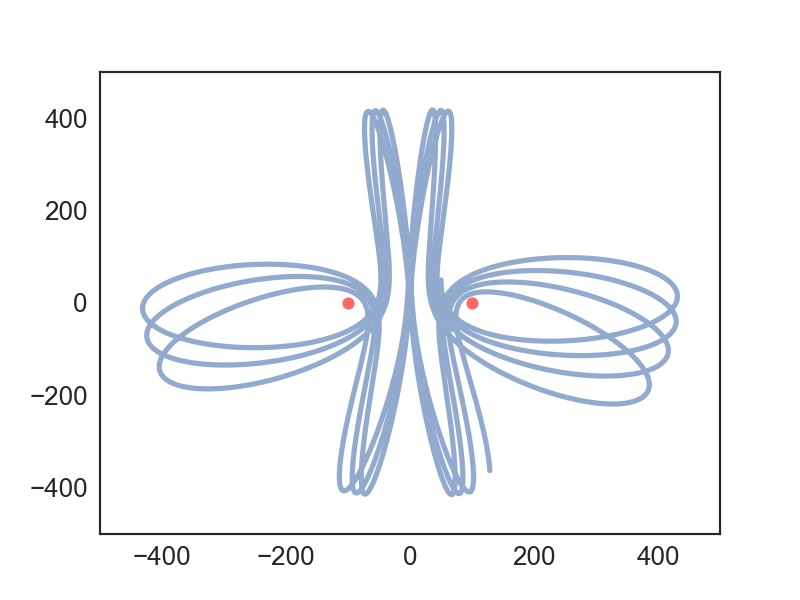

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [24]:
newfig()
plot(system.results.x_p1, system.results.y_p1)
plot(-100, 0, 'ro')
plot(100, 0, 'ro')
decorate(xlim = [-500, 500],
         ylim = [-500, 500])

<IPython.core.display.Javascript object>


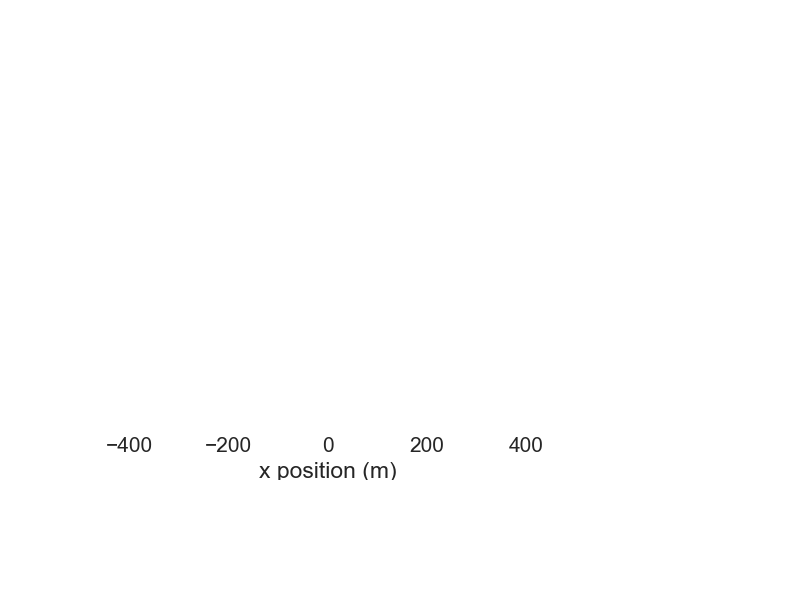

KeyboardInterrupt: 

In [235]:
newfig()
plot(-100, 0, 'ro')
plot(100, 0, 'ro')
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim = [-500, 500],
         ylim =[-500, 500],
         legend=False)
for x, y in zip(system.results.x_p1, system.results.y_p1):
    plot(x, y, 'bo', update=False)
    #sleep(0.00001)

In [86]:
v = Vector(1, 1)
v

<Quantity([1 1], 'dimensionless')>

In [39]:
a = type(v)
print(a)

NameError: name 'v' is not defined

In [40]:
v1 = v.mag * v

NameError: name 'v' is not defined

In [66]:
type(v1)

pint.unit.build_quantity_class.<locals>.Quantity

In [67]:
v1

<Quantity([ 1.41421356  1.41421356], 'dimensionless')>